# Lab 7 -  SVM

In current lab we will study the Support Vector Machine Classifier using the lab of the ["An Introduction to Statistical Learning"](https://www.statlearning.com/) book.  

The original lab can be found in the book [GitHub](https://github.com/intro-stat-learning/ISLP_labs/blob/stable/Ch09-svm-lab.ipynb), while a demonstration of the lab is also available in chapter 9 of the [book](https://hastie.su.domains/ISLP/ISLP_website.pdf.download.html).  

### Install ISLP library
Before we start we can download the library of the book that contain some useful utilities tools for the current lab.

In [35]:
!pip install ISLP==0.3.20

You should consider upgrading via the '/Users/andreasathanasopoulos/Phd/projects/bayesian_fairness/envs/bayesian-fairness/bin/python3.9 -m pip install --upgrade pip' command.



# Chapter 9



# Lab: Support Vector Machines
In this lab, we use the `sklearn.svm` library to demonstrate the support vector machine.

We  import some of our usual libraries.

In [36]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import confusion_table

We also collect the new imports
needed for this lab.

In [37]:
from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

### Linear Separatable Classes

To begign we consider a situation in which the two classes are linearly separable. 

Then we can find an optimal separating hyperplane using the SVM model.  

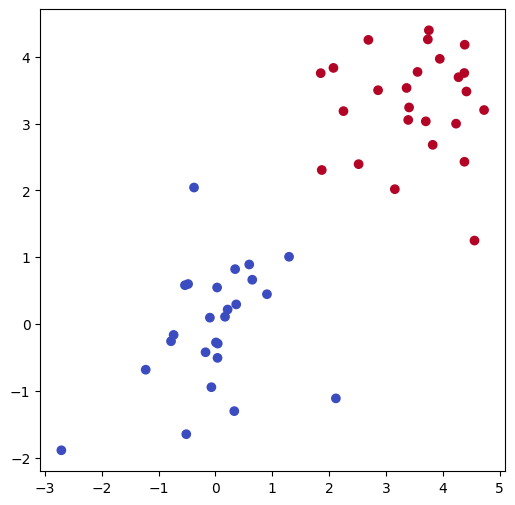

In [38]:
rng = np.random.default_rng(1)

X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 3.5

fig, ax = subplots(figsize=(6,6))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm);


## Support Vector Classifier

We now use the `SupportVectorClassifier()` function (abbreviated `SVC()`) from `sklearn` to fit the support vector
classifier for a given value of the parameter `C`.  

The `C` argument allows us to generalize the algorithm to non separatable class, by allowing some violation on the contrains of the svm function.

Then `C` is small then:
1. The margin are generaly wider
2. We allown more margin violations , or missclassified points


Then `C` is big then:
1. The margin are smaller
2. We dont allown margin violations , or missclassified points

In [39]:
from sklearn.metrics import accuracy_score

svm_ = SVC(C=100.0, kernel='linear')
svm_.fit(X, y)

SVC(C=100.0, kernel='linear')

In [40]:
y_hat = svm_.predict(X)
print("Accuracy :", accuracy_score(y_hat, y)*100, "%")

Accuracy : 100.0 %


Our algorithm has 100 % accuracy as our data are linear separatable.  
Accualy this is also true for the logistic regression, but SVM find the hyperplane with the greater margin beetween the points.

In [42]:
# we can also get the parameters of the hyperplane
svm_.coef_

array([[0.74923451, 1.20829821]])

The support vector classifier with two features can
be visualized by plotting values of its *decision function*.
We have included a function for this in the `ISLP` package (inspired by a similar
example in the `sklearn` docs).

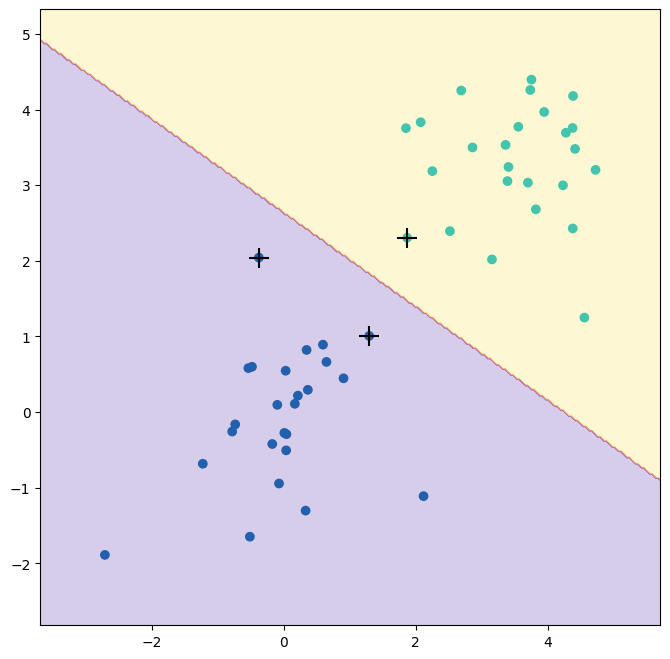

In [43]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X,
         y,
         svm_,
         ax=ax)

We now try a smaller value of `C`.

In [44]:
svm_ = SVC(C=0.1, kernel='linear').fit(X, y)
y_hat = svm_.predict(X)
print("Accuracy :", accuracy_score(y_hat, y)*100, "%")

Accuracy : 100.0 %


Using `C=0.1`, we again 100% accurate but allow some margine violation results in a different hyperplane. 
You can observe that we have a different set of support vector and the margin between the two lines are wider.

When we allown some violation we can ignore potential outlier and, so in general it's more stable.

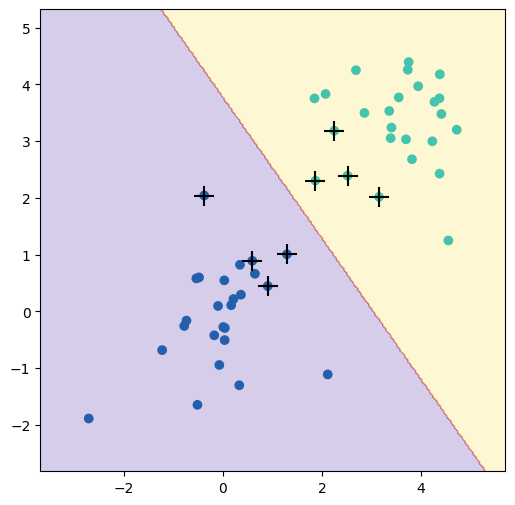

In [45]:
fig, ax = subplots(figsize=(6,6))
plot_svm(X,
         y,
         svm_,
         ax=ax)

###  Non-Linear Separatable Classes
we move on by creating some overlaping data, witch is posible to party separate using a simple line.

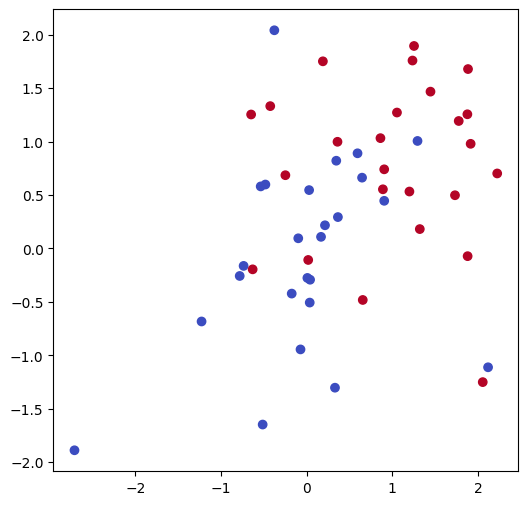

In [46]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50, 2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1
fig, ax = subplots(figsize=(6,6))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm);


We now fit the classifier.

In [47]:
svm_linear = SVC(C=100.0, kernel='linear')
svm_linear.fit(X, y)

SVC(C=100.0, kernel='linear')

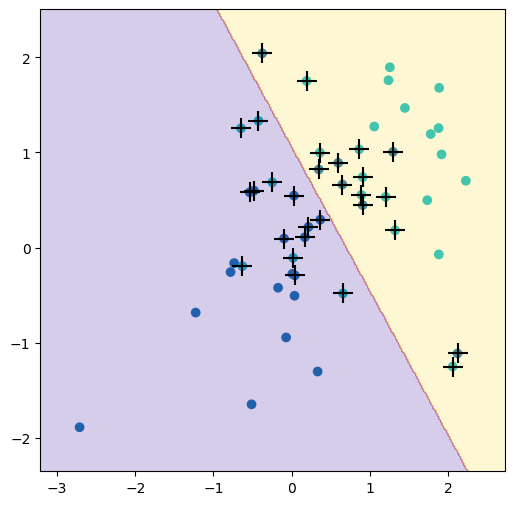

In [48]:
fig, ax = subplots(figsize=(6,6))
plot_svm(X,
         y,
         svm_linear,
         ax=ax)

What if we instead used a smaller value of the cost parameter?

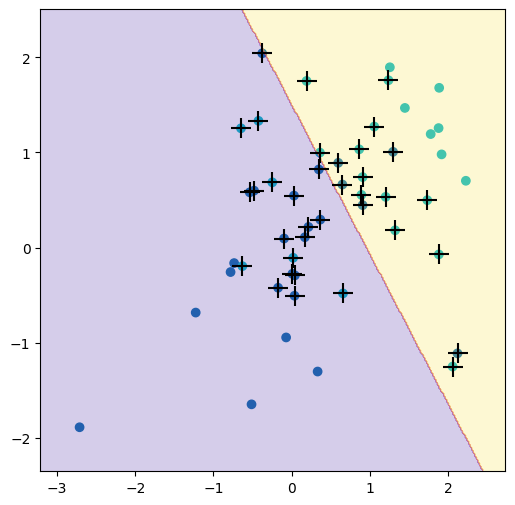

In [50]:
svm_linear_small = SVC(C=0.1, kernel='linear')
svm_linear_small.fit(X, y)
fig, ax = subplots(figsize=(6,6))
plot_svm(X,
         y,
         svm_linear_small,
         ax=ax)


With  a smaller value of the cost parameter, we obtain a larger number of support vectors, because the margin is now wider.

### Hyperparameter tunning
In order to get the optimal hyperparameter for the svm we can apply some model selection tenquieqe as we dint with the other algorithms.

Next, we use the cross validation and grid search in order to find the best value for C.

In [51]:
grid = skm.GridSearchCV(svm_linear,
                        {'C':[0.001,0.01,0.1,1,5,10,100]},
                        cv=10,
                        scoring='accuracy')
grid.fit(X, y)

GridSearchCV(cv=10, estimator=SVC(C=100.0, kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10, 100]},
             scoring='accuracy')

We can easily access the cross-validation errors for each of these models
in  `grid.cv_results_`.  
This prints out a lot of detail, so we extract the accuracy results only.

In [52]:
import pandas as pd
pd.DataFrame(grid.cv_results_)[["param_C","mean_test_score", "rank_test_score"]]

,param_C,mean_test_score,rank_test_score
0,0.001,0.40,7
1,0.01,0.56,6
2,0.1,0.74,2
3,1,0.76,1
4,5,0.74,2
5,10,0.74,2
6,100,0.74,2


In [53]:
grid.best_params_

{'C': 1}

We see that  `C=1` results in the highest cross-validation
accuracy of 0.76, though
the accuracy is the same for several values of `C`.  
The classifier `grid.best_estimator_` can be used to predict the class
label on a set of test observations.  
Let’s generate a test data set.

In [54]:
X_test = rng.standard_normal((20, 2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] += 1

Now we predict the class labels of these test observations. Here we
use the best model selected by cross-validation in order to make the
predictions.

In [55]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test_hat, y_test)*100, "%")

Accuracy on test set: 70.0 %


###  Non-Linear Separatable  2
Now contiue by constracting a more complex dataset witch is not posible to get a good perfmomance with a linear model.

In [56]:
X = rng.standard_normal((200, 2))
X[:100] += 2
X[100:150] -= 2
y = np.array([1]*150+[2]*50)

In [57]:
(X_train, 
 X_test,
 y_train,
 y_test) = skm.train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=0)

Plotting the data makes it clear that the class boundary is indeed non-linear.

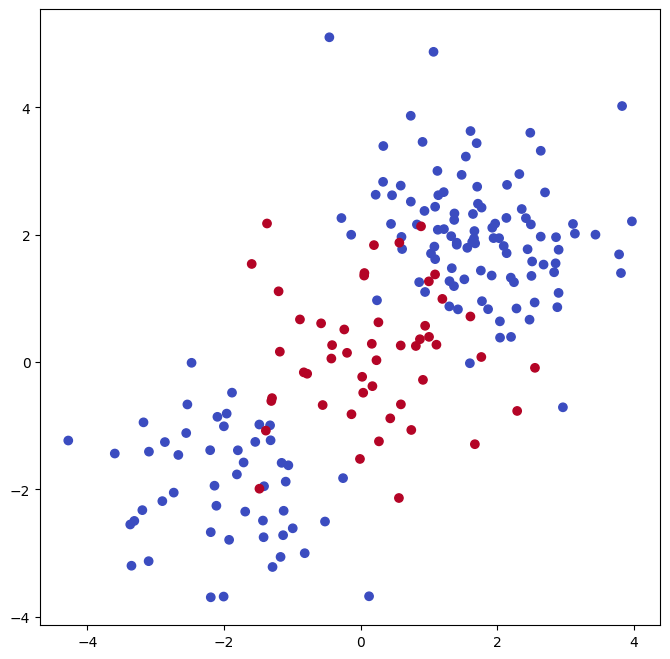

In [58]:
fig, ax = subplots(figsize=(8,8))
ax.scatter(X[:,0],
           X[:,1],
           c=y,
           cmap=cm.coolwarm)


### Non-linear kernel
In order to fit an SVM using a non-linear kernel, we once again use the `SVC()`  estimator. 


`SVC()` has also a `kernel`  parameter  to spesify the desired kernel. 

Some popular options are the :
1. The polynomial kernel, (`kernel="poly"`)  with parameter `d`, witch spesify the deegre of the polynomio.
2. The rbf kernel (`kernel="rbf"`) with parameter `gamma`.

We first generate some data with a non-linear class boundary, as follows:

We can fit the training data using the `SVC()`  estimator with a radial kernel and $\gamma=0.5$:

In [59]:
svm_rbf_1 = SVC(kernel="rbf", gamma=1, C=1)
svm_rbf_1.fit(X_train, y_train)

SVC(C=1, gamma=1)

The plot shows that the resulting SVM has a decidedly non-linear
boundary. 

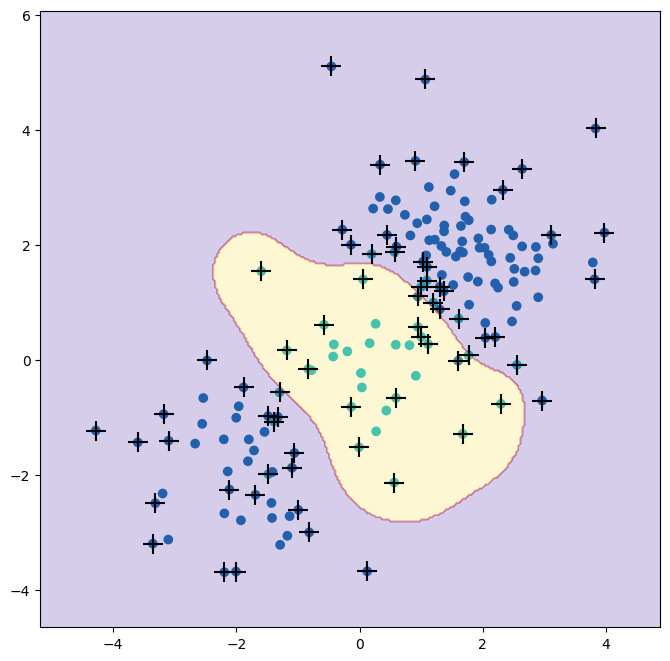

In [60]:
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         svm_rbf_1,
         ax=ax)

We can see from the figure that there are a fair number of training
errors in this SVM fit.  

If we increase the value of `C`, we can reduce the number of training errors. 
However, this comes at the price of a more irregular decision boundary that seems to be at risk of overfitting the data.

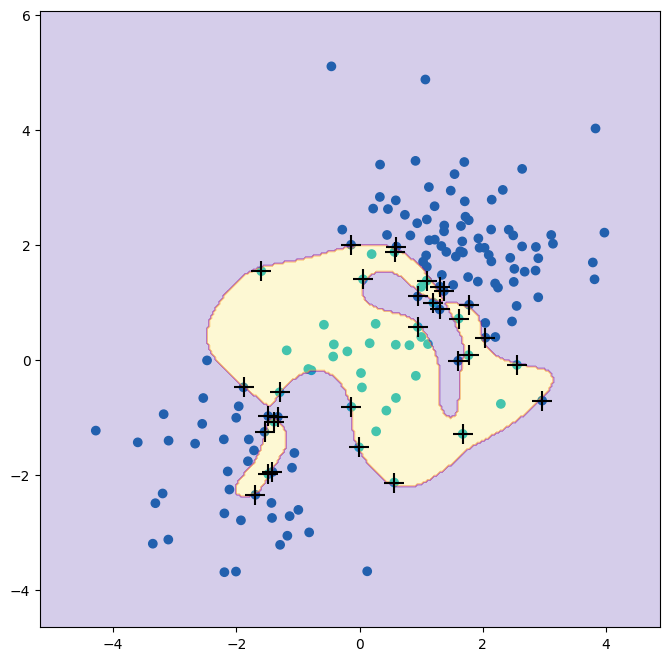

In [61]:
svm_rbf_2 = SVC(kernel="rbf", gamma=1, C=10000)
svm_rbf_2.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         svm_rbf_2,
         ax=ax)


Intuitevly smaller gamma parameter results to smoother descition function and thus less overfit.  
Bellow we illustrate the effect of increasing the gamma parameter.

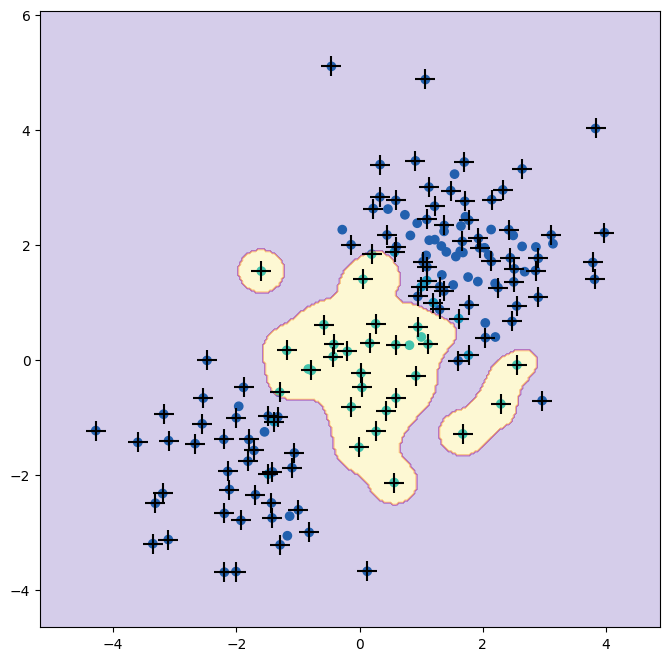

In [62]:
svm_rbf_3 = SVC(kernel="rbf", gamma=5, C=1)
svm_rbf_3.fit(X_train, y_train)
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         svm_rbf_3,
         ax=ax)

### Hyperparameter tunning

So in order to get the best model we have to perfom hyperparameter tunning to select the best setting for our kernel and model parameters

We can perform cross-validation using `skm.GridSearchCV()`  to select the
best choice of $\gamma$ and `C` for an SVM with a radial
kernel:

In [64]:
grid = skm.GridSearchCV(svm_rbf_3,
                        {'C':[0.1,1,10,100,1000, 10000],
                         'gamma':[0.1, 0.5,1,2,3,4,10]},
                        cv=10,
                        scoring='accuracy');
grid.fit(X_train, y_train)
grid.best_params_

{'C': 1, 'gamma': 0.1}

In [66]:
pd.DataFrame(grid.cv_results_)[["param_C","mean_test_score", "rank_test_score"]]

,param_C,mean_test_score,rank_test_score
0,0.1,0.76250,38
1,0.1,0.86875,14
2,0.1,0.79375,37
3,0.1,0.76250,38
4,0.1,0.76250,38
5,0.1,0.76250,38
6,0.1,0.76250,38
7,1,0.91875,1
8,1,0.90000,2
9,1,0.89375,8


The best choice of parameters under five-fold CV is achieved at `C=1`
and `gamma=0.5`, though several other values also achieve the same
value.

accucary score: 90.0 %


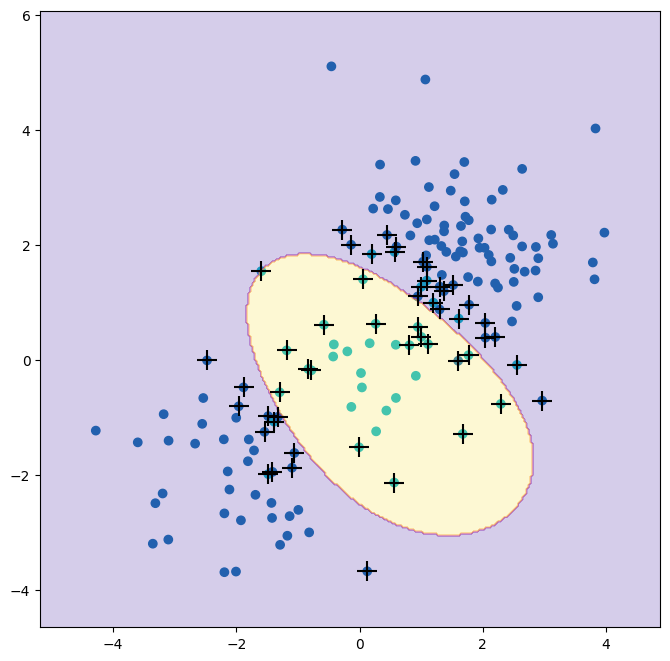

In [67]:
best_svm = grid.best_estimator_
fig, ax = subplots(figsize=(8,8))
plot_svm(X_train,
         y_train,
         best_svm,
         ax=ax)

y_hat_test = best_svm.predict(X_test)
print("accucary score:", accuracy_score(y_hat_test, y_test) * 100, "%")

by perfom hyperparameter tunning we get a smooth desiction boundary that genelise when in our test data.